In [1]:
from __future__ import print_function
from pathlib import Path
import sys, os
import numpy as np
import pandas as pd

import nilmtk
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')

from adinilm.utils import paths_manager as pathsman

In [2]:
rcParams['figure.figsize'] = (17, 12)

In [3]:
train_dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
test_dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
val_dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)

In [4]:
BUILDING = 1

In [5]:
train_dataset.buildings[BUILDING].elec["fridge"].power_series_all_data().mean()

40.56524

In [6]:
train_dataset.set_window(start="2014-03-30T19:30:00", end="2014-03-30T19:45:00")
test_dataset.set_window(start="2014-05-30")
val_dataset.set_window(start="2014-05-30")

In [7]:
train_elec = train_dataset.buildings[BUILDING].elec
test_elec = test_dataset.buildings[BUILDING].elec
val_elec = val_dataset.buildings[BUILDING].elec

In [8]:
appliance = {
    "fridge" : {},
    "boiler" : {},
    "washer dryer" : {},
    "HTPC" : {},
    "dish washer" : {},
    "microwave" : {}
}

In [9]:
indices = [train_elec[app].power_series_all_data().index for app in appliance.keys()]
sorted_indices = sorted(indices, key=len)

for i in sorted_indices:
        print(len(i))

124
124
124
124
125
137


In [10]:
main_index = sorted_indices[0]

reduced_power_series_list = []

for app in appliance.keys():
        power_series = train_elec[app].power_series_all_data()
        reduced_power_series = power_series[power_series.index.get_indexer(main_index, method="nearest")]
        reduced_power_series_list.append(reduced_power_series)

c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\pandas\core\indexes\base.py:3071: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  target = np.asarray(target)


In [11]:
len(reduced_power_series_list[1])

124

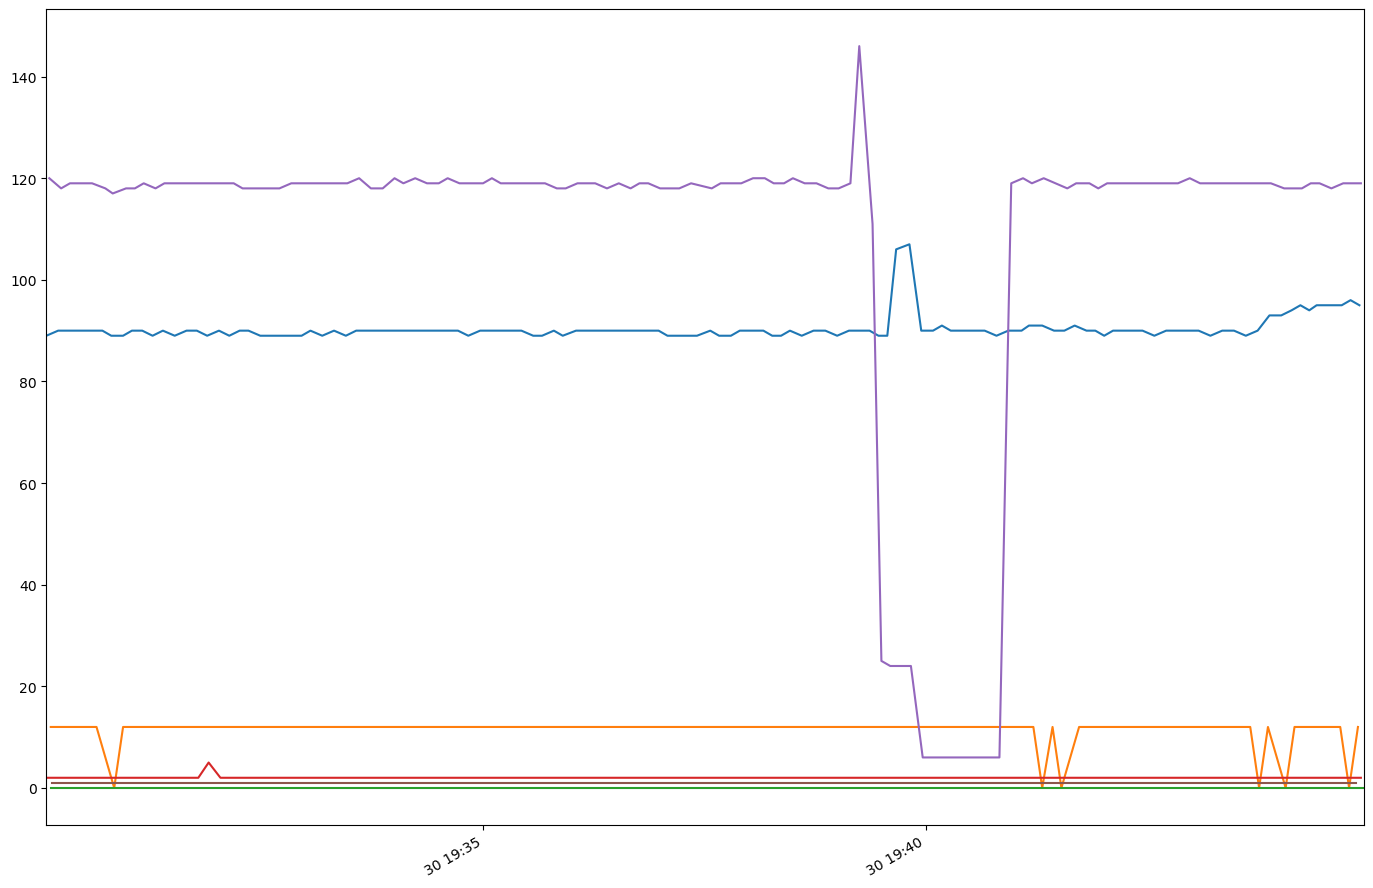

In [12]:
for reduced_power_series in reduced_power_series_list:
        reduced_power_series.plot()

In [13]:
# mains_series = train_elec.mains().power_series_all_data()
# reduced_main_power_series = mains_series[mains_series.index.get_indexer(main_index, method="nearest")]
# print(len(reduced_main_power_series))

In [19]:
mains_series = reduced_power_series_list[0] + reduced_power_series_list[1].values + reduced_power_series_list[2].values + reduced_power_series_list[3].values + reduced_power_series_list[4].values + reduced_power_series_list[5].values 


2014-03-30 19:30:04+01:00    224.0
2014-03-30 19:30:12+01:00    223.0
2014-03-30 19:30:18+01:00    224.0
2014-03-30 19:30:26+01:00    224.0
2014-03-30 19:30:34+01:00    224.0
                             ...  
2014-03-30 19:44:25+01:00    229.0
2014-03-30 19:44:33+01:00    228.0
2014-03-30 19:44:42+01:00    229.0
2014-03-30 19:44:48+01:00    218.0
2014-03-30 19:44:54+01:00    229.0
Name: (power, active), Length: 124, dtype: float32

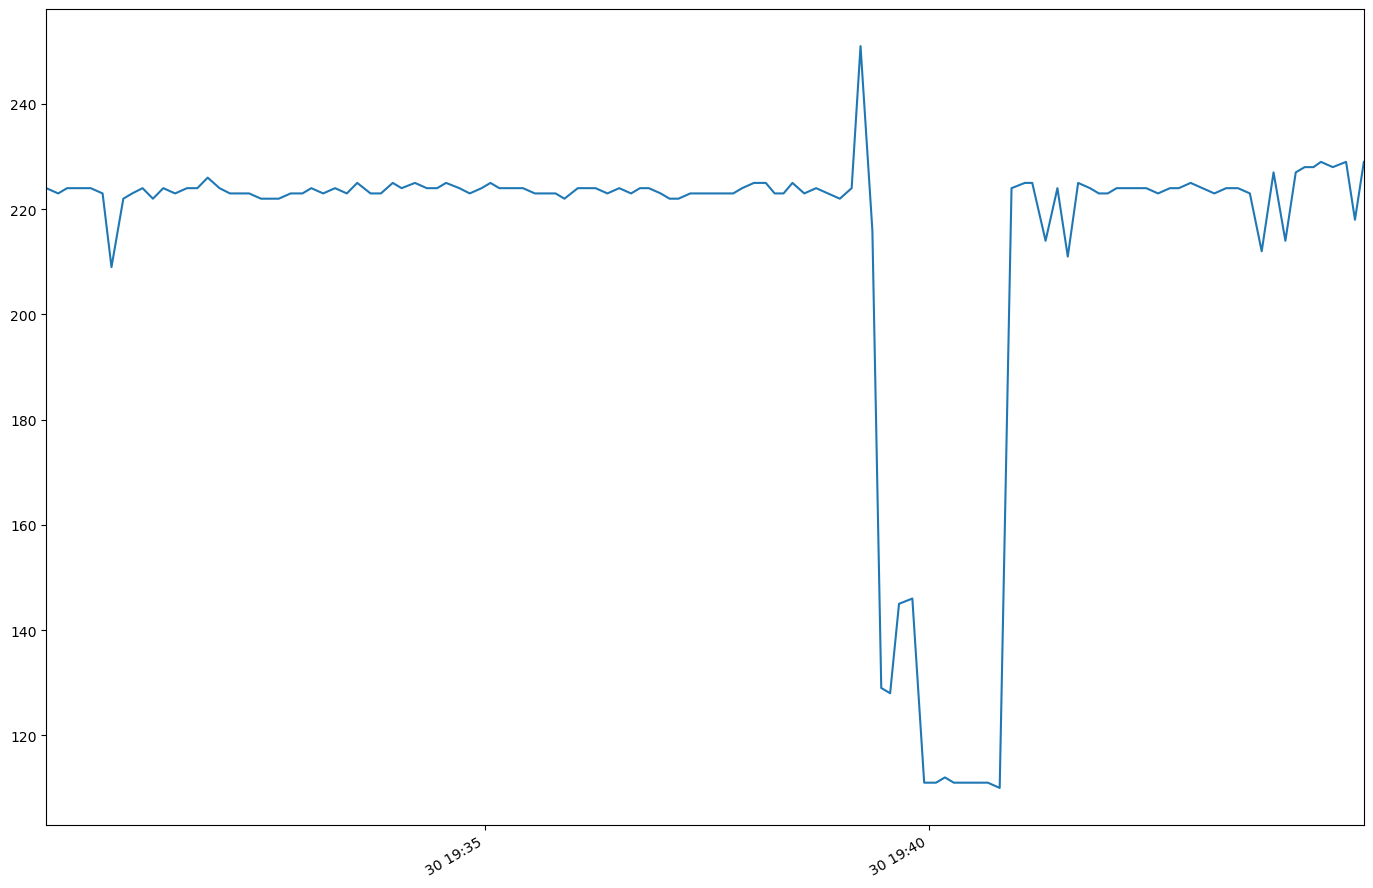

In [20]:
mains_series.plot()

In [22]:
tv_power_series = train_elec["television"].power_series_all_data()
reduced_tv_power_series = tv_power_series[tv_power_series.index.get_indexer(main_index, method="nearest")]

len(reduced_tv_power_series)

c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\pandas\core\indexes\base.py:3071: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  target = np.asarray(target)


124

In [23]:
mains_series = mains_series + reduced_tv_power_series.values

In [ ]:
type(mains_series)

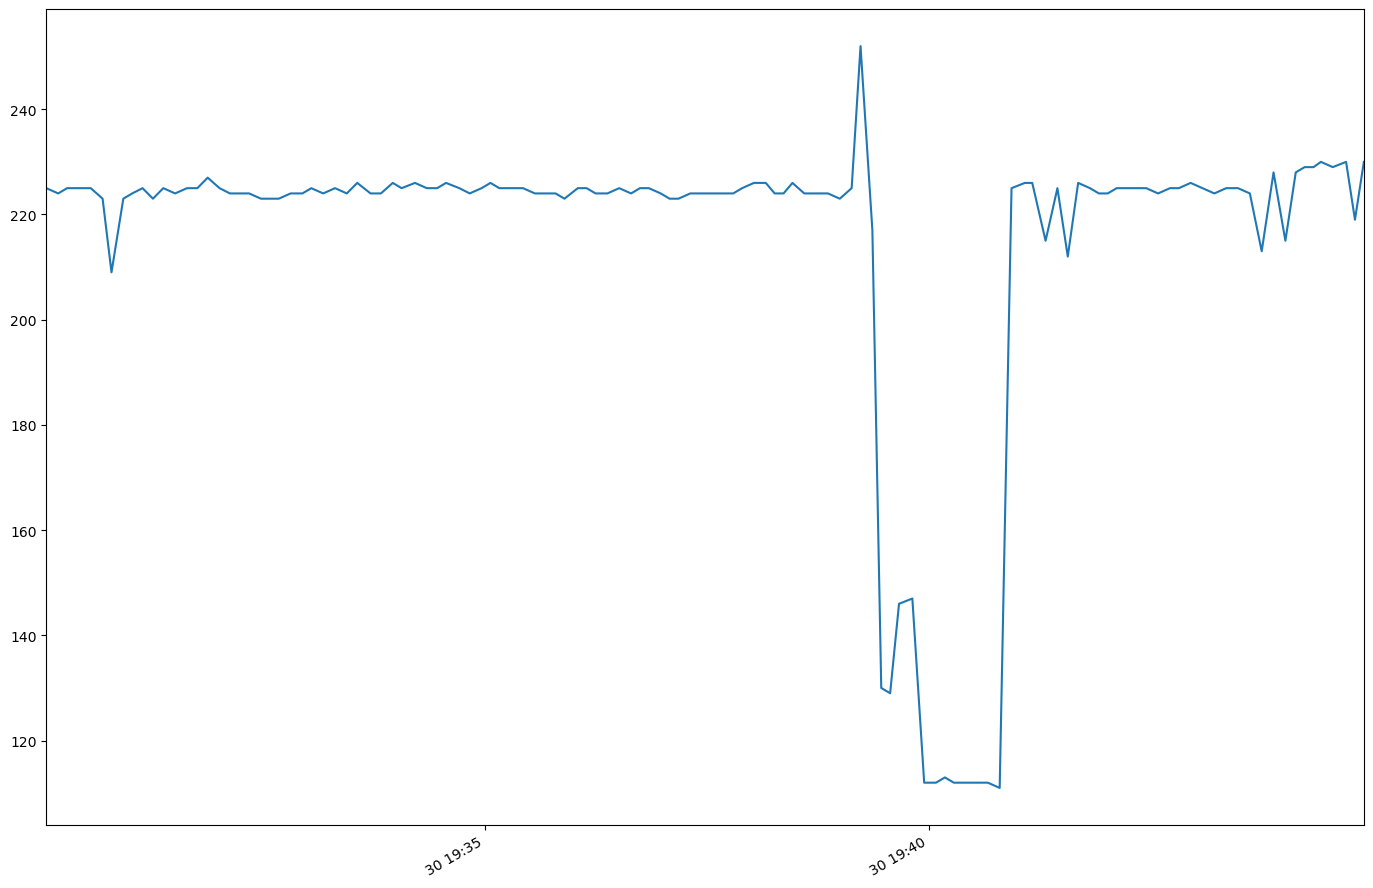

In [24]:
mains_series.plot()